<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_0_4_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_0.4'

In [5]:
os.listdir(base_path)

['data_add_delta_0.4_n20.csv',
 'data_add_delta_0.4_n30.csv',
 'data_add_delta_0.4_n60.csv',
 'data_add_delta_0.4_n120.csv',
 'data_add_delta_0.4_n250.csv']

In [6]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,82.968775,50.076917,96.099891,-1.761993,237.383590,238.239088,-0.855498
1,0.0,1.0,20.924695,55.697104,57.814619,-1.710585,142.725833,143.503169,-0.777336
2,0.0,2.0,82.482606,97.401672,55.404820,2.244723,247.533820,245.957097,1.576723
3,0.0,3.0,30.456155,47.887626,56.859299,8.063474,153.266554,144.215279,9.051275
4,0.0,4.0,47.118293,53.567921,43.030693,7.979953,161.696860,153.218683,8.478177
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,78.824827,50.975370,60.977698,11.449492,212.227387,200.956746,11.270641
249996,999.0,246.0,93.298474,99.686936,99.817231,-13.763114,289.039527,301.865604,-12.826077
249997,999.0,247.0,76.498335,88.665104,54.665548,-10.470631,219.358356,229.544575,-10.186219
249998,999.0,248.0,49.118063,78.640347,20.717934,2.238898,160.715241,158.518041,2.197199


In [7]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,82.968775,50.076917,96.099891,-1.761993,237.383590,238.239088,-0.855498
1,0.0,1.0,20.924695,55.697104,57.814619,-1.710585,142.725833,143.503169,-0.777336
2,0.0,2.0,82.482606,97.401672,55.404820,2.244723,247.533820,245.957097,1.576723
3,0.0,3.0,30.456155,47.887626,56.859299,8.063474,153.266554,144.215279,9.051275
4,0.0,4.0,47.118293,53.567921,43.030693,7.979953,161.696860,153.218683,8.478177
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,78.824827,50.975370,60.977698,11.449492,212.227387,200.956746,11.270641
249996,999.0,246.0,93.298474,99.686936,99.817231,-13.763114,289.039527,301.865604,-12.826077
249997,999.0,247.0,76.498335,88.665104,54.665548,-10.470631,219.358356,229.544575,-10.186219
249998,999.0,248.0,49.118063,78.640347,20.717934,2.238898,160.715241,158.518041,2.197199


In [8]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    82.968775  50.076917  96.099891  ...  237.383590  238.239088  -0.855498
      1.0    20.924695  55.697104  57.814619  ...  142.725833  143.503169  -0.777336
      2.0    82.482606  97.401672  55.404820  ...  247.533820  245.957097   1.576723
      3.0    30.456155  47.887626  56.859299  ...  153.266554  144.215279   9.051275
      4.0    47.118293  53.567921  43.030693  ...  161.696860  153.218683   8.478177
...                ...        ...        ...  ...         ...         ...        ...
999.0 245.0  78.824827  50.975370  60.977698  ...  212.227387  200.956746  11.270641
      246.0  93.298474  99.686936  99.817231  ...  289.039527  301.865604 -12.826077
      247.0  76.498335  88.665104  54.665548  ...  219.358356  229.544575 -10.186219
      248.0  49.118063  78.640347  20.717934  ...  160.715241  158.518041   2.197199
      249.0  31.972797  84.240279  71.399015  ...  192.776786  196.555290  -3.778505

[250000 rows x 7 columns]

In [9]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    82.968775  50.076917  96.099891  ...  237.383590  238.239088  -0.855498
      1.0    20.924695  55.697104  57.814619  ...  142.725833  143.503169  -0.777336
      2.0    82.482606  97.401672  55.404820  ...  247.533820  245.957097   1.576723
      3.0    30.456155  47.887626  56.859299  ...  153.266554  144.215279   9.051275
      4.0    47.118293  53.567921  43.030693  ...  161.696860  153.218683   8.478177
...                ...        ...        ...  ...         ...         ...        ...
999.0 245.0  78.824827  50.975370  60.977698  ...  212.227387  200.956746  11.270641
      246.0  93.298474  99.686936  99.817231  ...  289.039527  301.865604 -12.826077
      247.0  76.498335  88.665104  54.665548  ...  219.358356  229.544575 -10.186219
      248.0  49.118063  78.640347  20.717934  ...  160.715241  158.518041   2.197199
      249.0  31.972797  84.240279  71.399015  ...  192.776786  196.555290  -3.778505

[250000 rows x 7 columns]

In [10]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,82.968775,50.076917,96.099891,-1.761993,237.383590,238.239088,-0.855498
1,0.0,1.0,20.924695,55.697104,57.814619,-1.710585,142.725833,143.503169,-0.777336
2,0.0,2.0,82.482606,97.401672,55.404820,2.244723,247.533820,245.957097,1.576723
3,0.0,3.0,30.456155,47.887626,56.859299,8.063474,153.266554,144.215279,9.051275
4,0.0,4.0,47.118293,53.567921,43.030693,7.979953,161.696860,153.218683,8.478177
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,78.824827,50.975370,60.977698,11.449492,212.227387,200.956746,11.270641
249996,999.0,246.0,93.298474,99.686936,99.817231,-13.763114,289.039527,301.865604,-12.826077
249997,999.0,247.0,76.498335,88.665104,54.665548,-10.470631,219.358356,229.544575,-10.186219
249998,999.0,248.0,49.118063,78.640347,20.717934,2.238898,160.715241,158.518041,2.197199


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    82.968775  50.076917  96.099891  ...  237.383590  238.239088  -0.855498
      1.0    20.924695  55.697104  57.814619  ...  142.725833  143.503169  -0.777336
      2.0    82.482606  97.401672  55.404820  ...  247.533820  245.957097   1.576723
      3.0    30.456155  47.887626  56.859299  ...  153.266554  144.215279   9.051275
      4.0    47.118293  53.567921  43.030693  ...  161.696860  153.218683   8.478177
...                ...        ...        ...  ...         ...         ...        ...
999.0 245.0  78.824827  50.975370  60.977698  ...  212.227387  200.956746  11.270641
      246.0  93.298474  99.686936  99.817231  ...  289.039527  301.865604 -12.826077
      247.0  76.498335  88.665104  54.665548  ...  219.358356  229.544575 -10.186219
      248.0  49.118063  78.640347  20.717934  ...  160.715241  158.518041   2.197199
      249.0  31.972797  84.240279  71.399015  ...  192.776786  196.555290  -3.778505

[250000 rows x 7 columns]

In [13]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

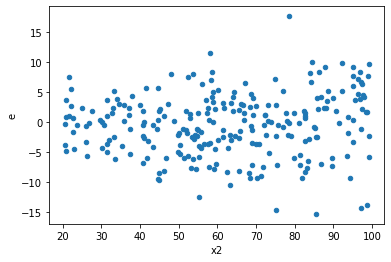

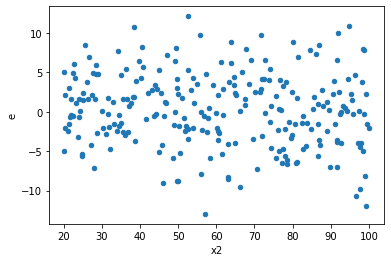

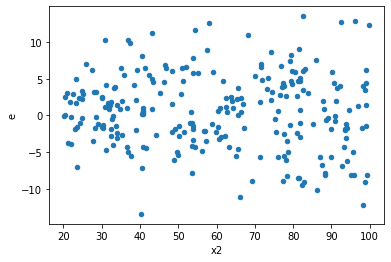

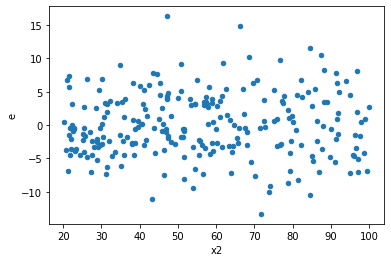

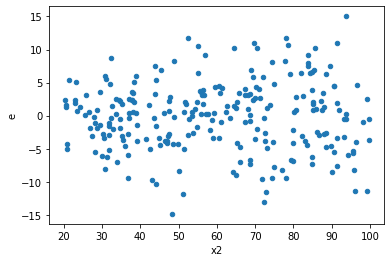

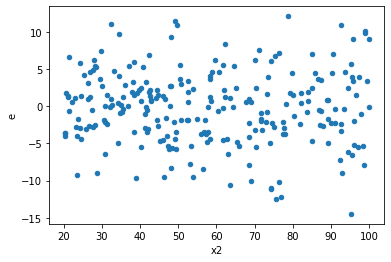

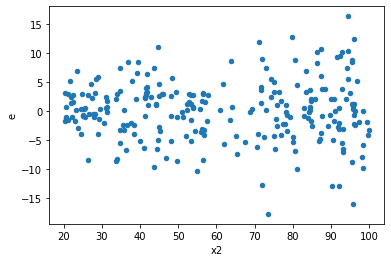

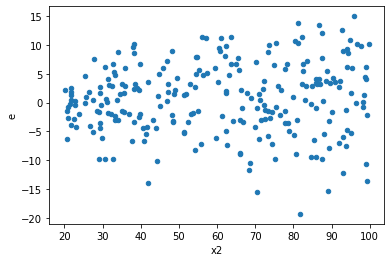

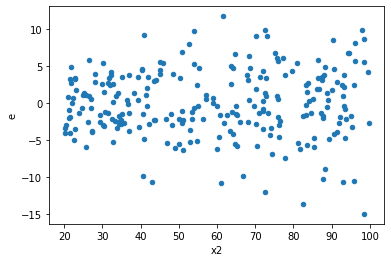

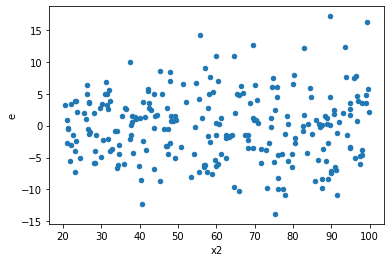

In [14]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [15]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,97.0,97.0,3452.3023003823346,1656.4805392058997,35.96148229564932,17.255005616728123,2.0841188403199316,0.0003601402200388293,0.9998199298899806,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,2277.896835902139,1582.3454396204884,23.728092040647283,16.482764996046754,1.4395698808020534,0.07431486227383655,0.9628425688630817,Reject001=1 : Homoscedasticity
2.0,97.0,97.0,3336.4846653392015,1785.8285593296707,34.75504859728335,18.602380826350736,1.8683118532898733,0.002321930376868009,0.998839034811566,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,2821.4036079991397,1808.4568421616666,29.389620916657705,18.838092105850695,1.5601166376891182,0.02957967873671774,0.9852101606316411,Reject001=1 : Homoscedasticity
4.0,97.0,97.0,3625.033883974023,1889.0583578319993,37.760769624729406,19.67769122741666,1.9189634184379232,0.0015045557865334125,0.9992477221067333,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,2780.3820724898883,1416.8106222789618,28.962313255103002,14.758443982072519,1.9624232263431234,0.0010347405572983526,0.9994826297213508,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,3675.991175200342,1694.4646832150563,38.291574741670225,17.65067378349017,2.169411503003746,0.0001712333992465176,0.9999143833003767,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,4719.64881604751,2086.020234078004,49.1630085004949,21.72937743831254,2.262513440160152,7.597008185222798e-05,0.9999620149590739,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,2707.80829593629,1223.4398863275717,28.206336416003023,12.744165482578872,2.2132744944783367,0.00011676697135865055,0.9999416165143207,Reject001=0 : Heteroscedasticity


In [17]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,3452.3023003823346,1656.4805392058997,35.96148229564932,17.255005616728123,2.0841188403199316,0.0003601402200388293,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,2277.896835902139,1582.3454396204884,23.728092040647283,16.482764996046754,1.4395698808020534,0.07431486227383655,Reject001=1 : Homoscedasticity
2.0,97.0,97.0,3336.4846653392015,1785.8285593296707,34.75504859728335,18.602380826350736,1.8683118532898733,0.002321930376868009,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,2821.4036079991397,1808.4568421616666,29.389620916657705,18.838092105850695,1.5601166376891182,0.02957967873671774,Reject001=1 : Homoscedasticity
4.0,97.0,97.0,3625.033883974023,1889.0583578319993,37.760769624729406,19.67769122741666,1.9189634184379232,0.0015045557865334125,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,2780.3820724898883,1416.8106222789618,28.962313255103002,14.758443982072519,1.9624232263431234,0.0010347405572983526,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,3675.991175200342,1694.4646832150563,38.291574741670225,17.65067378349017,2.169411503003746,0.0001712333992465176,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,4719.64881604751,2086.020234078004,49.1630085004949,21.72937743831254,2.262513440160152,7.597008185222798e-05,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,2707.80829593629,1223.4398863275717,28.206336416003023,12.744165482578872,2.2132744944783367,0.00011676697135865055,Reject001=0 : Heteroscedasticity


In [18]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    748
Reject001=1 : Homoscedasticity      252
Name: Result_test, dtype: int64